In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.inspection import permutation_importance


In [3]:
# Load data
# This assumes data is in a DataFrame called df with 'NDVI', 'NBR' as columns and 'label' as target column

data = pd.read_csv('labeled_data.csv')
data['NBR'] = data['NBR'].apply(lambda x: pd.eval(x, local_dict={'nan': np.nan}))
data['NDVI'] = data['NDVI'].apply(lambda x: pd.eval(x, local_dict={'nan': np.nan}))
data.head()


,ID,NDVI,NBR,Label
0,20230813_100,"[0.7755693773142729, 0.8109320515721594, 0.851...","[0.003078832689977299, 0.049812837737360276, 0...",1
1,20230813_101,"[0.34495916148451133, 0.24291931815932866, 0.2...","[0.05116118296949416, -0.026290510714717576, 0...",2
2,20230813_102,"[0.8418304439153839, 0.798698150698662, 0.8062...","[0.058663947405941635, 0.04357172884127514, 0....",1
3,20230813_103,"[0.5716647915500211, 0.5872206605870187, 0.589...","[0.019482128930850738, 0.009917857640267346, 0...",2
4,20230813_104,"[-0.2217794764351386, -0.22595804483580587, -0...","[0.006908720294918405, 0.00880010401111331, -0...",0


In [10]:
X = np.array([np.ravel(nbr + ndvi)
             for nbr, ndvi in zip(data['NBR'], data['NDVI'])])
X = np.nan_to_num(X)

# Labels
y = data['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
# Classifier used: Radial Basis Function (RBF)
# it can combine multiple polynomial kernels multiple times of different degrees to
# project the non-linearly separable data into higher dimensional space

# gamma: https://www.ibm.com/docs/sr/spss-modeler/18.0.0?topic=node-svm-expert-options
# C: https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/

model = svm.SVC().fit(X_train, y_train)


In [45]:
# Calculate model efficiency

y_pred = model.predict(X_test)


In [46]:
# Calculate the accuracy and f1 scores for SVM with RBF kernel

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
# rbf_average_precision = average_precision_score(y_test, rbf_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# print(f"Mean Average Precision: {rbf_average_precision:.4f}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.4242
Precision: 0.6016
Recall: 0.2836
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        23
           1       0.41      1.00      0.58        26
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         6

    accuracy                           0.42        66
   macro avg       0.60      0.28      0.21        66
weighted avg       0.68      0.42      0.28        66

[[ 1 22  0  0]
 [ 0 26  0  0]
 [ 0 10  1  0]
 [ 0  6  0  0]]


/Users/I741798/Documents/Private/Capstone/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/I741798/Documents/Private/Capstone/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/I741798/Documents/Private/Capstone/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

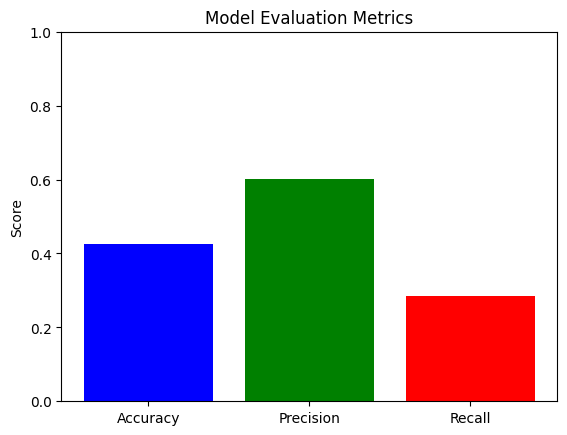

In [48]:
# Visualize the model evaluation metrics

metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # to set y-axis limits from 0 to 1
plt.show()
